In [3]:
#import sys
#!{sys.executable} -m pip install scipy

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chisquare

In [2]:
def generateData(totalSamples, seed, minX, maxX):
    #Set random seed
    np.random.seed(seed)

    # Create placeholder array
    returnArray = np.zeros(totalSamples)

    # Generate samples
    for i in range(totalSamples):
        returnArray[i] = np.random.randint(minX, maxX)
    return returnArray

def generatePlot(data, bins, minX, maxX, toggleCount = True):
    # Creating the histogram again with aligned columns
    counts, bins, _ = plt.hist(data, bins=bins, edgecolor='black', align='mid')

    # Annotating the counts or percentages above each column
    if toggleCount:
        for count, bin in zip(counts, bins[:-1]):
            plt.text(bin + 0.5, count, str(int(count)), ha='center', va='bottom')
    else:
        for count, bin in zip(counts, bins[:-1]):
            plt.text(bin + 0.5, count, ("%.2f%%") % (100 * count/len(data)), ha='center', va='bottom')

    # Print out chi-squared with counts
    print([len(data)/4]*(len(bins)-1))
    print(counts)
    print('Chi Squared = %.3f' % goodnessOfFitTest([len(data)/4]*(len(bins)-1), counts))
    print(chisquare(f_obs=counts, f_exp=[len(data)/4]*(len(bins)-1)))
    print('\n')
    # Setting up the plot with titles and labels
    plt.title('1D Histogram of Random Integers (1 to 4) for %d Samples' % len(data))
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.xticks(range(minX, maxX))  # Setting x-ticks to properly align with the bins

    # Displaying the histogram with counts
    plt.show()

def goodnessOfFitTest(expectedValues, counts):
    # Calculate chi-squared
    chiSquared = 0
    # Sum for each expected value
    for i in range(len(expectedValues)):
        chiSquared += (expectedValues[i] - counts[i])**2/expectedValues[i]
    return chiSquared

[0.00810064 0.34283286 0.61180636 0.3957919  0.85841863 0.38904003
 0.28747495 0.04191988 0.41419948 0.43938835]


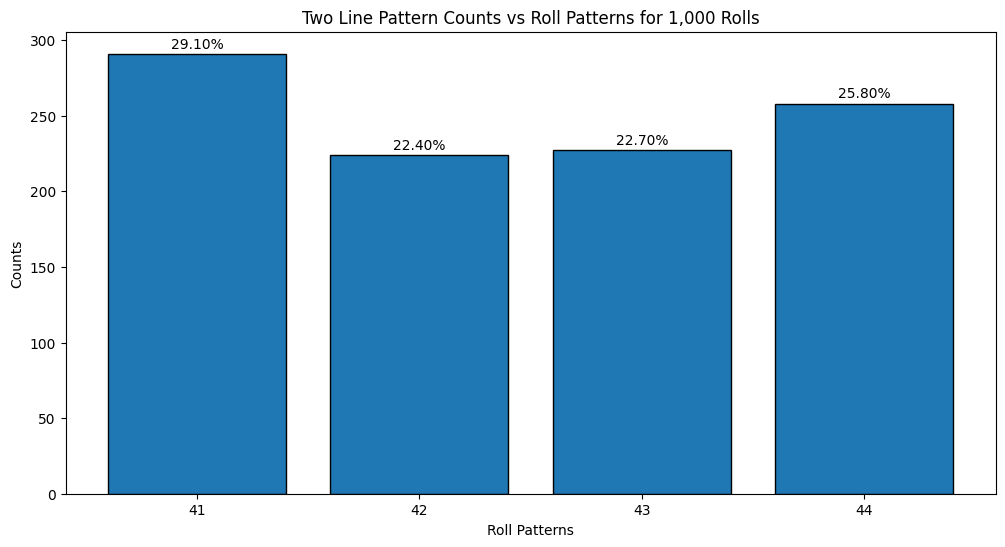

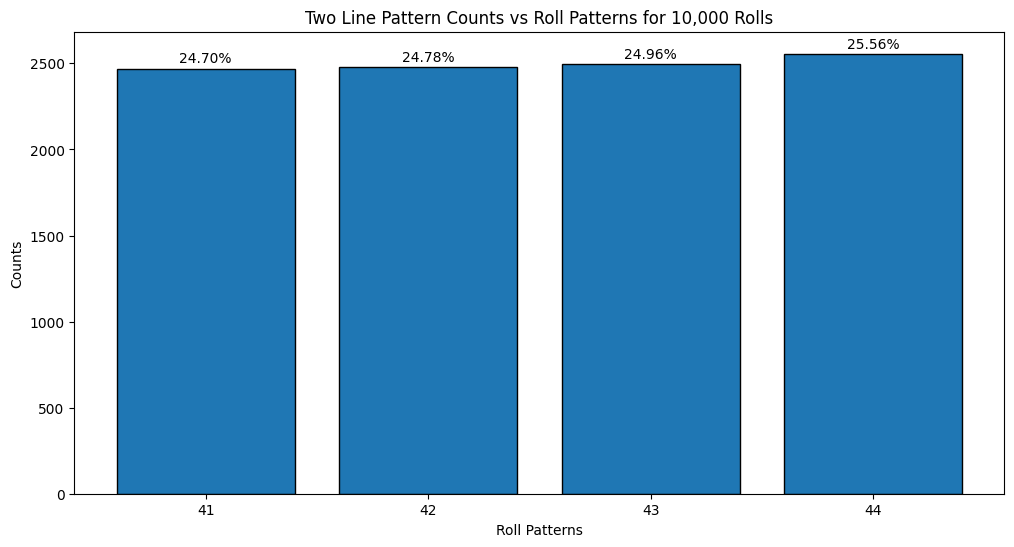

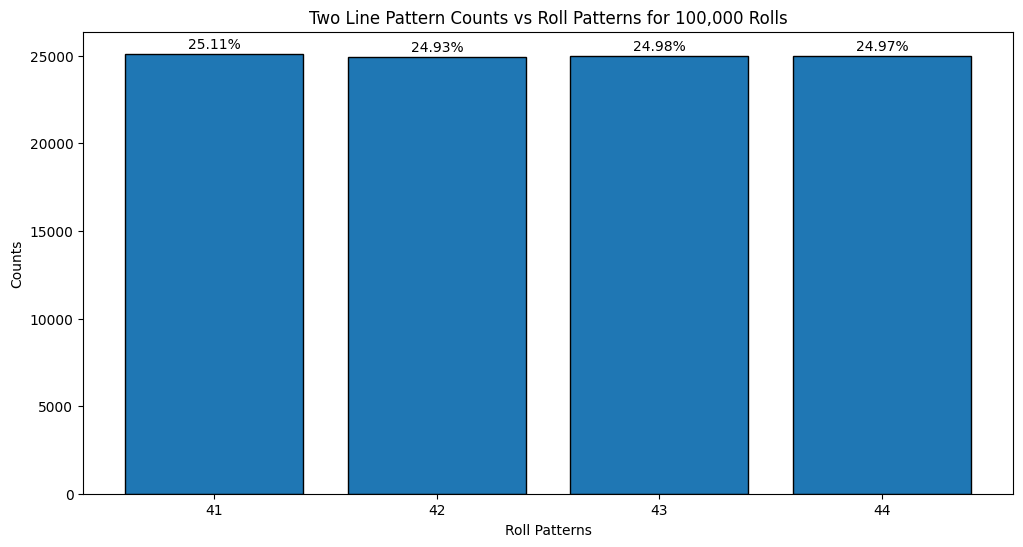

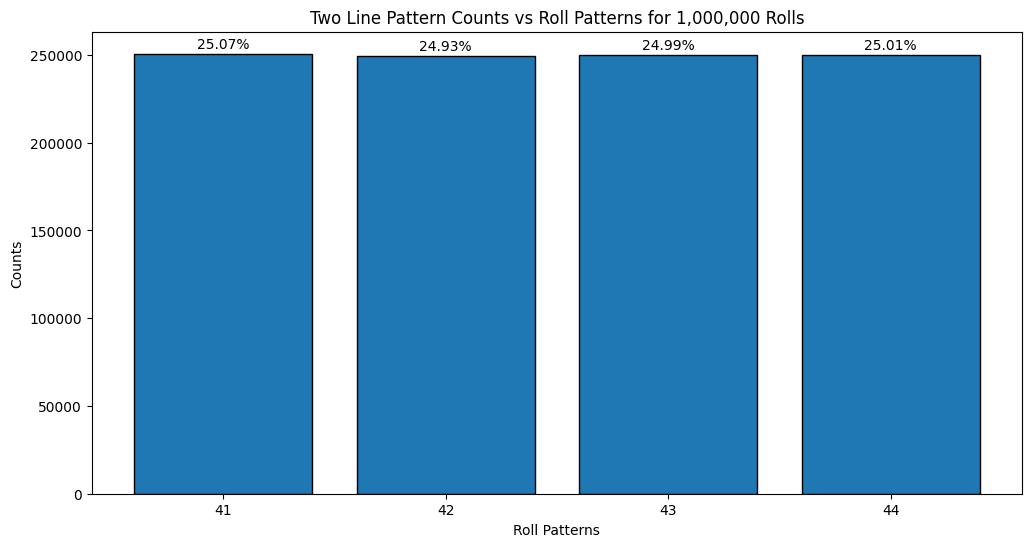

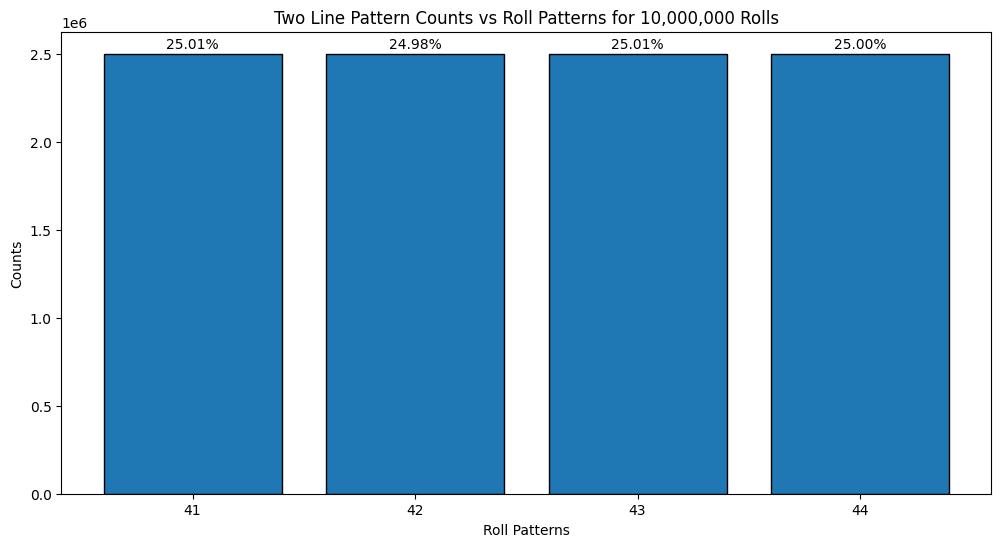

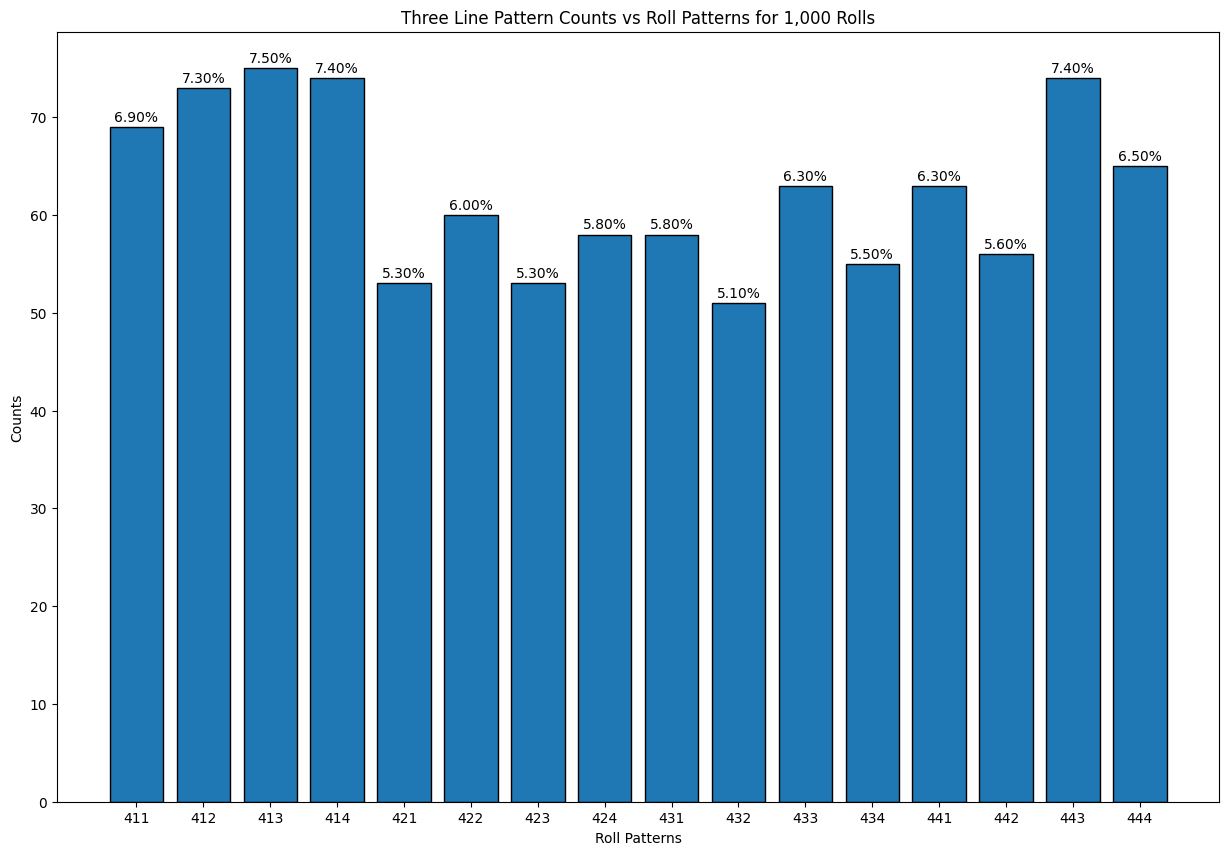

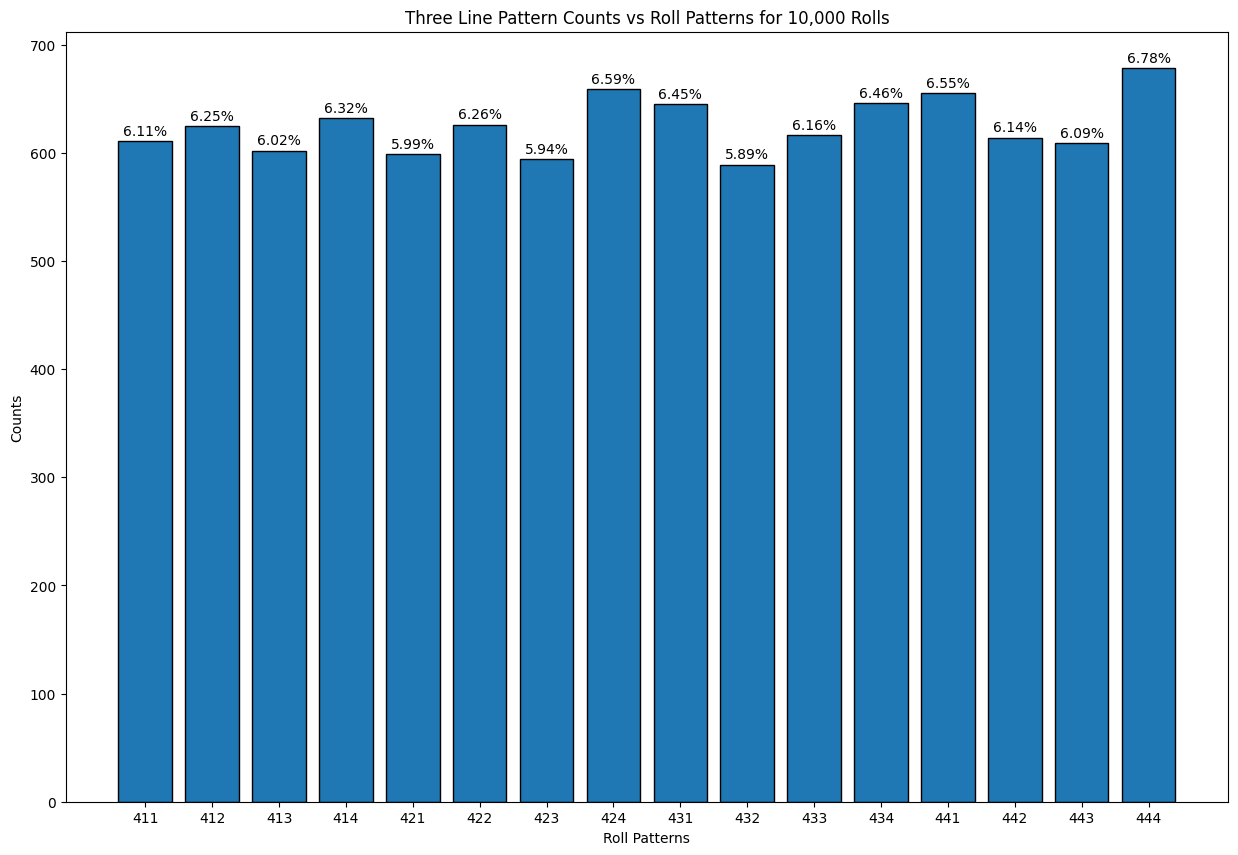

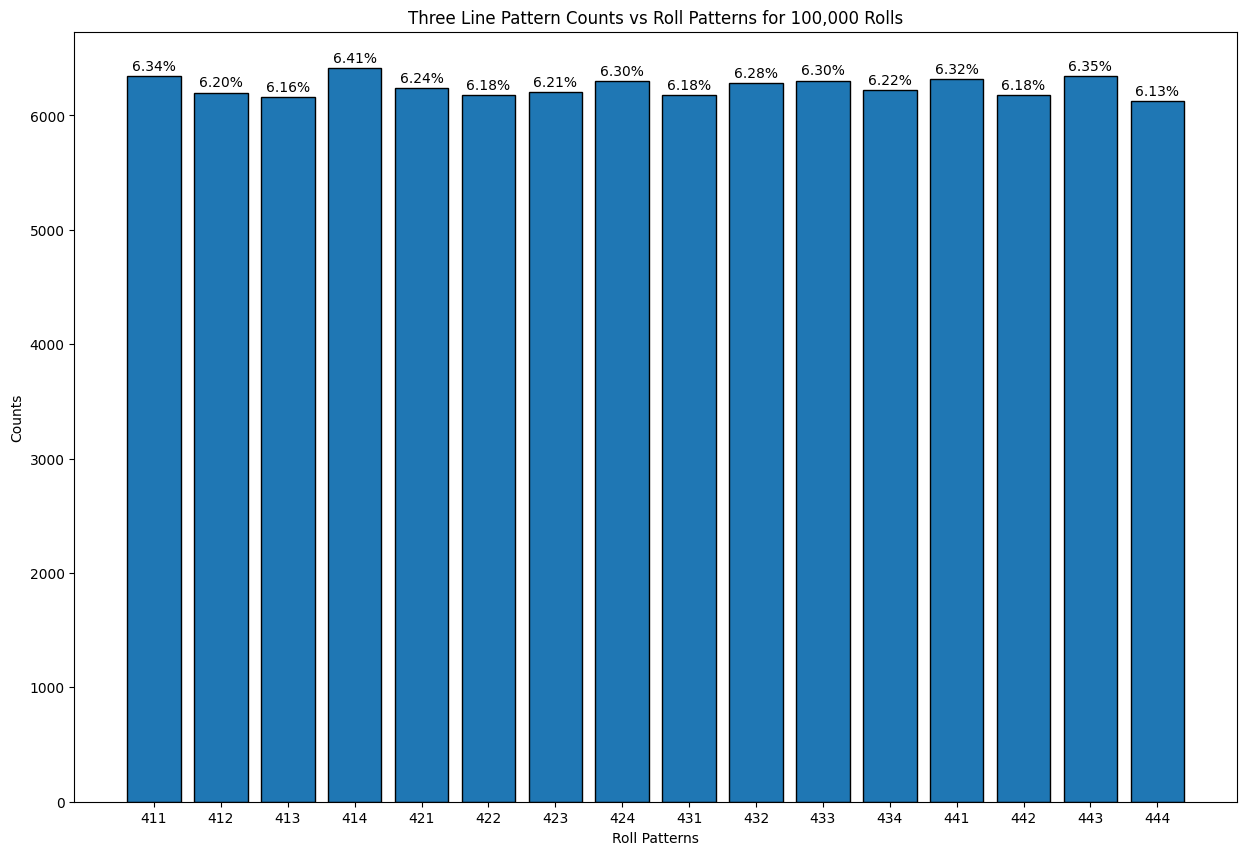

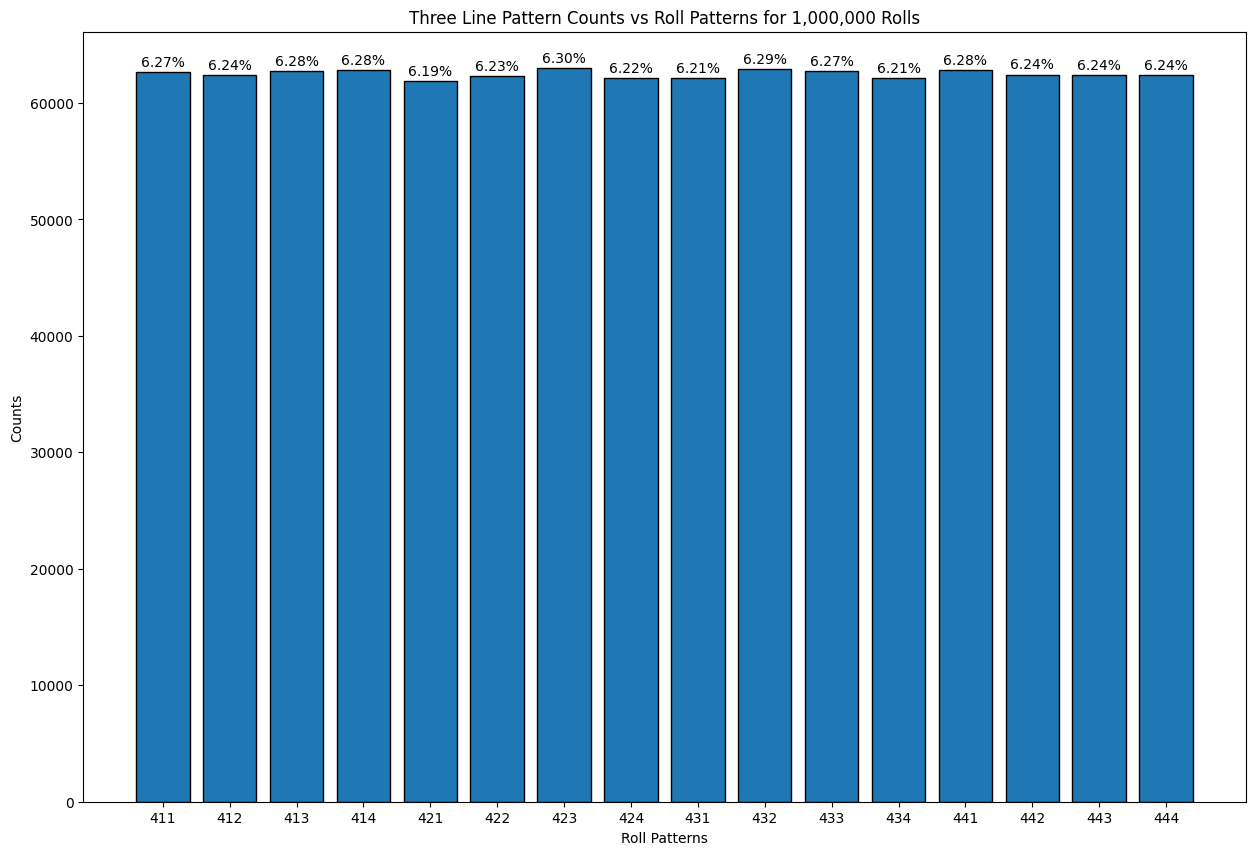

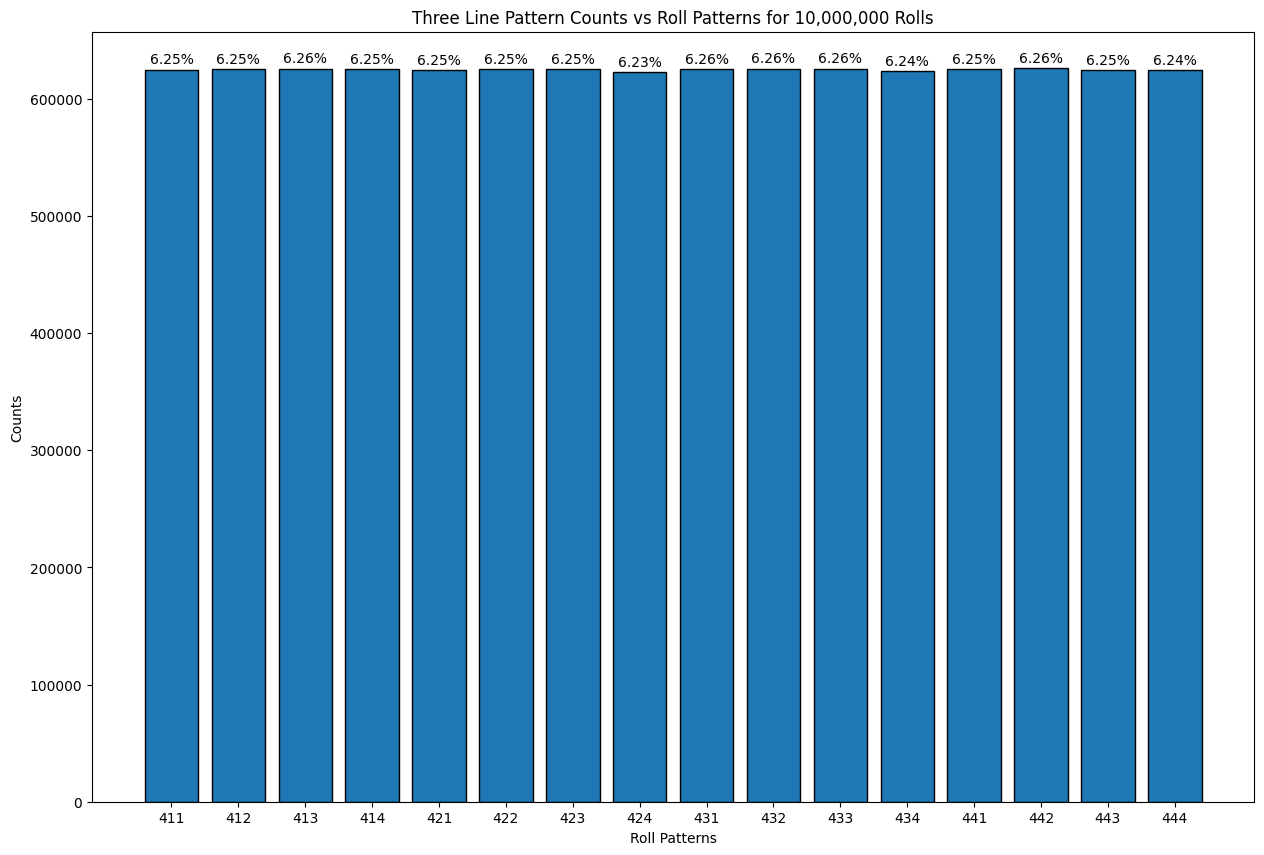

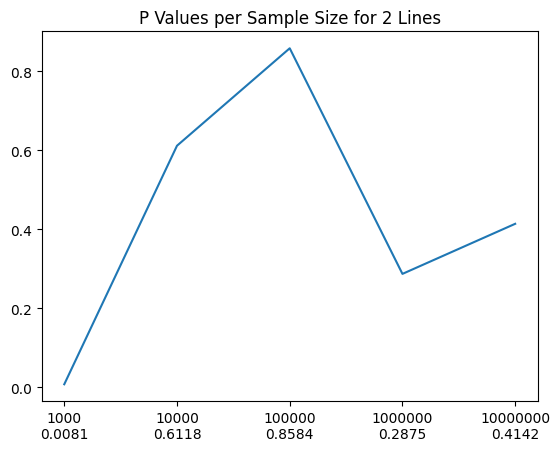

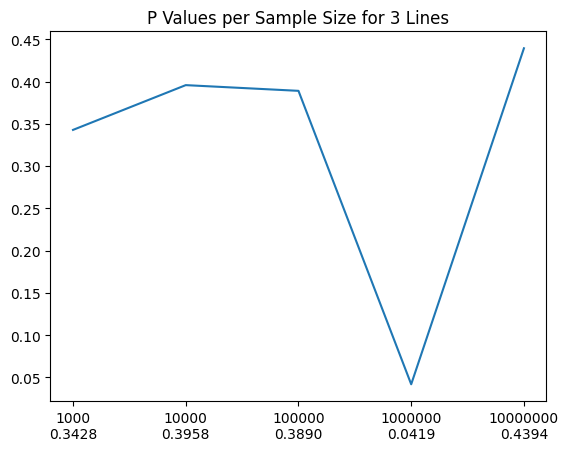

In [38]:
# Analyziing simulated counts from C# random algorithm

simulatedCounts = { 
    'twoLineArray1000Samples': [291,224,227,258], 
    'threeLineArray1000Samples': [69,73,75,74,53,60,53,58,58,51,63,55,63,56,74,65], 

    'twoLineArray10000Samples': [2470,2478,2496,2556], 
    'threeLineArray10000Samples': [611,625,602,632,599,626,594,659,645,589,616,646,655,614,609,678], 

    'twoLineArray100000Samples': [25115,24931,24980,24974], 
    'threeLineArray100000Samples': [6345,6199,6160,6411,6241,6181,6206,6303,6177,6280,6304,6219,6320,6181,6346,6127], 

    'twoLineArray1000000Samples': [250674,249318,249897,250111], 
    'threeLineArray1000000Samples': [62668,62415,62754,62837,61897,62279,62972,62170,62119,62936,62714,62128,62830,62447,62406,62428], 

    'twoLineArray10000000Samples': [2501031,2497765,2501026,2500178], 
    'threeLineArray10000000Samples': [624933,625133,625833,625132,624517,625148,625071,623029,625501,625834,625877,623814,625111,626007,624604,624456]
}

sampleList = ['1000', '10000', '100000', '1000000', '10000000']
sampleListComma = ['1,000', '10,000', '100,000', '1,000,000', '10,000,000']
# Generate expected value arrays based on input data
def generateExpectedValues(data):
    tempSum = 0
    for value in data:
        tempSum += value
    return [float(tempSum)/len(data)] * len(data)

def getAllStatsSimulated(sampleList):
    returnChiSquared = np.zeros(len(2 * sampleList))
    returnPValue = np.zeros(len(2 * sampleList))
    for i in range(len(sampleList)):
        key2Line = 'twoLineArray' + sampleList[i] + 'Samples'
        key3Line = 'threeLineArray' + sampleList[i] + 'Samples'
        data2Line = simulatedCounts[key2Line]
        data3Line = simulatedCounts[key3Line]
        fullResults2Line = chisquare(f_obs=data2Line, f_exp=generateExpectedValues(data2Line))
        fullResults3Line = chisquare(f_obs=data3Line, f_exp=generateExpectedValues(data3Line))

        #print(days[i] +' results for ' + str(numOfLines) + ' lines')
        #print("Chi-Squared = %.3f" % fullResultsLine.statistic)
        #print("p-value = %.3f \n" % fullResultsLine.pvalue)

        returnChiSquared[2 * i] = fullResults2Line.statistic
        returnPValue[2 * i] = fullResults2Line.pvalue
        returnChiSquared[2 * i + 1] = fullResults3Line.statistic
        returnPValue[2 * i + 1] = fullResults3Line.pvalue

    return returnChiSquared, returnPValue

def makePlotsSimulated(sampleList, pValues, numOfLines):
    # Make plot for 2 lines
    x = np.array([1, 2, 3, 4, 5])
    customXTicks = []
    tempPlotArray = []
    for i in range(int(len(pValues)/2)):
        if (numOfLines == 2):
            customXTicks.append(sampleList[i] + '\n%.4f' % pValues[2 * i])
            tempPlotArray.append(pValues[2 * i])
        else:
            customXTicks.append(sampleList[i] + '\n%.4f' % pValues[2 * i + 1])
            tempPlotArray.append(pValues[2 * i + 1])
    plt.figure()
    plt.title("P Values per Sample Size for " + str(numOfLines) + " Lines")
    plt.xticks(x, customXTicks)
    plt.plot(x, tempPlotArray)
    plt.show()

def makeHistogramPlots(sampleList, numOfLines):
    for i in range(len(sampleList)):
        if (numOfLines == 2):
            keyLine = 'twoLineArray' + sampleList[i] + 'Samples'
            customXTicks = [41,42,43,44]
            x = range(4)
            fig, ax = plt.subplots(figsize=(12, 6))
            plt.title("Two Line Pattern Counts vs Roll Patterns for %s Rolls" % sampleListComma[i])
        else:
            keyLine = 'threeLineArray' + sampleList[i] + 'Samples'
            customXTicks = [411,412,413,414,421,422,423,424,431,432,433,434,441,442,443,444]
            x = range(16)
            fig, ax = plt.subplots(figsize=(15, 10))
            plt.title("Three Line Pattern Counts vs Roll Patterns for %s Rolls" % sampleListComma[i])

        rects = ax.bar(x, simulatedCounts[keyLine], width=0.8, align='center', ec='black')
        plt.xlabel("Roll Patterns")
        plt.ylabel("Counts")
        plt.xticks(x, customXTicks)
        for r in rects:
            h = r.get_height()
            percent = float(100 * h) / int(sampleList[i])
            ax.annotate('{:.2f}%'.format(percent),
                    xy=(r.get_x() + r.get_width() / 2, h),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        plt.show()


chiValues, pValues = getAllStatsSimulated(sampleList)
print(pValues)
makeHistogramPlots(sampleList, 2)
makeHistogramPlots(sampleList, 3)
makePlotsSimulated(sampleList, pValues, 2)
makePlotsSimulated(sampleList, pValues, 3)

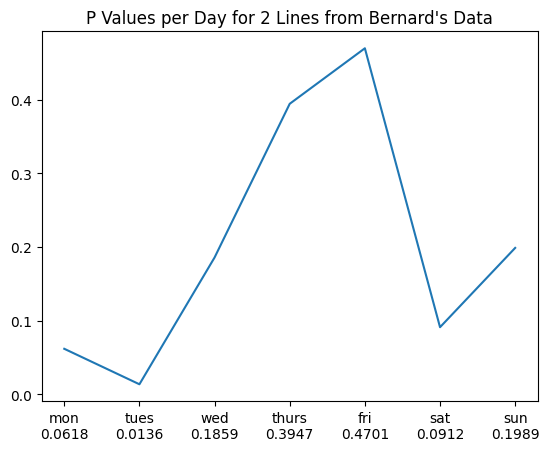

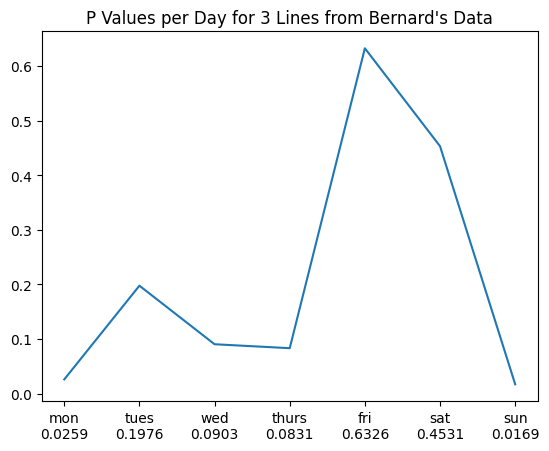

In [39]:
''' 
Check across all data gathered across all dates for Bernard's spreadsheet
Note that this data is a few days before the end of patch 2.0, so some numbers
will be a bit off 

Only checking up to 3 line data because not enough data was collected to really
characterize 4 lines properly
'''

days = ['mon', 'tues', 'wed', 'thurs', 'fri', 'sat', 'sun']

countsList = {
    # Monday
    'monCounts2Line': [160, 159, 137, 121],
    'monCounts3Line': [25, 24, 22, 15, 30, 28, 26, 20, 37, 33, 33, 28, 43, 39, 27, 26],

    # Tuesday
    'tuesCounts2Line': [166, 146, 130, 114],
    'tuesCounts3Line': [38, 36, 36, 21, 31, 25, 24, 23, 39, 36, 33, 32, 27, 27, 24, 22],

    # Wednesday
    'wedCounts2Line': [141, 120, 117, 108],
    'wedCounts3Line': [36, 25, 25, 21, 28, 26, 16, 12, 26, 20, 17, 17, 27, 26, 22, 19],

    # Thursday
    'thursCounts2Line': [219, 208, 193, 188],
    'thursCounts3Line': [44, 35, 34, 33, 52, 50, 40, 38, 44, 44, 38, 31, 57, 50, 42, 30],

    # Friday
    'friCounts2Line': [101, 94, 90, 80],
    'friCounts3Line': [22, 21, 19, 18, 25, 23, 17, 14, 29, 23, 20, 15, 20, 19, 17, 14],

    # Saturday
    'satCounts2Line': [195, 176, 173, 148],
    'satCounts3Line': [34, 32, 27, 26, 44, 41, 37, 32, 36, 35, 35, 34, 46, 44, 44, 40],

    # Sunday
    'sunCounts2Line': [137, 121, 110, 107],
    'sunCounts3Line': [36, 24, 21, 21, 29, 22, 19, 13, 23, 23, 22, 17, 38, 31, 25, 17]
}

def getAllStatsActual(days, numOfLines):
    returnChiSquared = np.zeros(len(days))
    returnPValue = np.zeros(len(days))
    for i in range(len(days)):
        keyLine = days[i] + 'Counts' + str(numOfLines) + 'Line'
        dataLine = countsList[keyLine]
        fullResultsLine = chisquare(f_obs=dataLine, f_exp=generateExpectedValues(dataLine))

        #print(days[i] +' results for ' + str(numOfLines) + ' lines')
        #print("Chi-Squared = %.3f" % fullResultsLine.statistic)
        #print("p-value = %.3f \n" % fullResultsLine.pvalue)

        returnChiSquared[i] = fullResultsLine.statistic
        returnPValue[i] = fullResultsLine.pvalue

    return returnChiSquared, returnPValue

def makePlotsActual(days, pValues, numOfLines):
    x = np.array([1, 2, 3, 4, 5, 6, 7])
    customXTicks = []
    for i in range(len(pValues)):
        customXTicks.append(days[i] + '\n%.4f' % pValues[i])
    plt.figure()
    plt.title("P Values per Day for " + str(numOfLines) + " Lines from Bernard's Data")
    plt.xticks(x, customXTicks)
    plt.plot(x, pValues)
    plt.show()

chi2Lines, pValues2Lines = getAllStatsActual(days, 2)
chi3Lines, pValues3Lines = getAllStatsActual(days, 3)

makePlotsActual(days, pValues2Lines, 2)
makePlotsActual(days, pValues3Lines, 3)

In [29]:
# Data analysis on 1% builds
from scipy.stats import binom

# Parameter definition
probUniform = 0.5
probBiased = 0.85
numFlips = 4
minUpgrades = 3
totalRelics = 150
numGoodRelics = 48

# Runs a simulation according to binomial distribution
# Returns probability 
def runRelicBinomialSim(probUpgrade, totalRelics, numGoodRelics):

    # Total probability of getting at least 3 heads
    prob3Heads = 1 - binom.cdf(2, numFlips, probUpgrade)

    # Probability of this occurring 48 times out of 1000 trials
    prob48Relics = 1 - binom.cdf(numGoodRelics - 1, totalRelics, prob3Heads)

    return prob48Relics

print('The probability that 48 out of 150 relics come out with at least 3 upgrades'
      +' we want with a 50%% chance for each upgrade is: %.2f' %
      (100 * runRelicBinomialSim(probUniform, totalRelics, numGoodRelics)) + '%.')
print('The probability that 48 out of 150 relics come out with at least 3 upgrades'
      +' we want with an 85%% chance for each upgrade is: %.2f' %
      (100 * runRelicBinomialSim(probBiased, totalRelics, numGoodRelics)) + '%.')


The probability that 48 out of 150 relics come out with at least 3 upgrades we want with a 50% chance for each upgrade is: 45.19%.
The probability that 48 out of 150 relics come out with at least 3 upgrades we want with an 85% chance for each upgrade is: 100.00%.
